<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Preprocess_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



# Normalización

Se conoce como normalización a los procesos que utilizando conceptos estadísticos permiten representar un conjunto de características en una misma escala. Existen diversos tipos de normalización:

- Min-Max Scaling: Proceso en el cual se utilizan los valores máximos y mínimos de la variable para representarla en una escala entre 0 y 1. Generalmente tiene sentido aplicar esta técnica cuando los datos no siguen una distribución determinada.

- Standarization: Proceso en el cual se utiliza la media y la desviación estandar de la variable para centrar los valores en una escala entre -1 y 1.  Generalmente tiene sentido aplicar esta técnica cuando los datos siguen una distribución Gaussiana (normal).

Veamos como se aplica esta técnica utilizando sklearn.



---









In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = sns.load_dataset("iris")

In [3]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# Standarization
X = dataset.iloc[:,:-1]
std_scl = StandardScaler()
X_transformed = std_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head(5)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
# Min-Max Scaling
min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head(5)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667




---



# Ejercicio

Aplicad ambos tipos de normalización sobre el dataset de pinguins


---






In [15]:
# Código aquí
dataset = sns.load_dataset("penguins")



---




# Reducción de Dimensionalidad - PCA

Un espacio de características especialmente amplio puede suponer un grave detrimento en el rendimiento de nuestro algoritmo de "machine learning". Con el objetivo de redistribuir este espacio de características reduciendo el número de las mismas surgen los algoritmos de reducción de dimensionalidad.

Un algoritmo de reducción de dimensionalidad utiliza la información disponible en las "features" de un dataset para generar características nuevas que supongan un aporte de información igual o mejor para el modelo.

Existen diferentes tipos de técnicas para realizar esta reducción de dimensionalidad. En este apartado vamos a estudiar la PCA (Principal Component Analysis)

## PCA

El análisis de componentes principales (PCA) es una técnica de reducción de dimensionalidad lineal que calcula las direcciones en un espacio de características en las cuales se puede apreciar una mayor varianza y realiza un cambio de ejes para realizar una proyección ortogonal sobre los mismos.

Podemos elevar el concepto a un punto intuitivo mediante la siguiente imagen

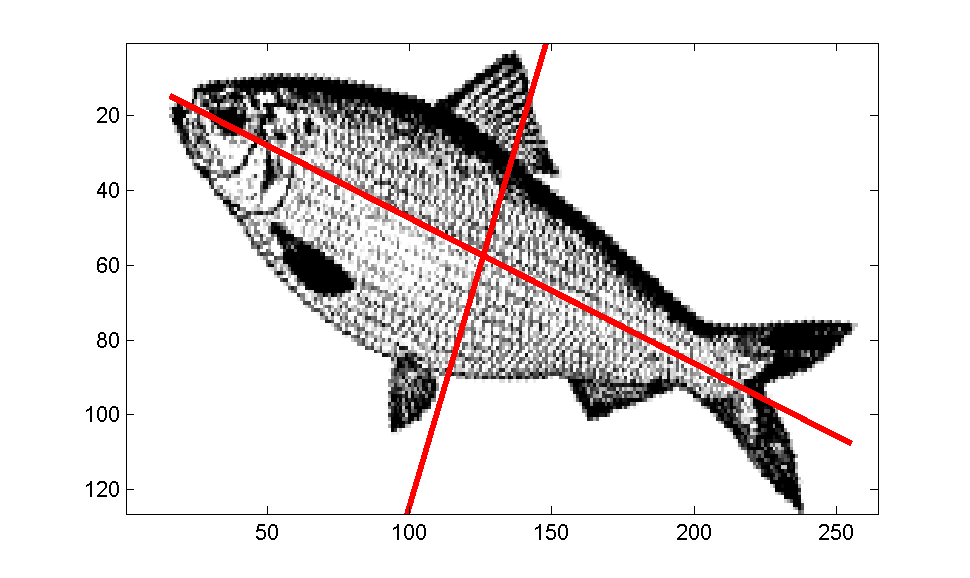

Como se puede apreciar en la imagen del pez, las direcciones calculadas son aquellas que mejor describen a nuestro pez pues este se extiende en esas direcciones. 

Las coordenadas de los puntos que definen al pez están originalmente definidas sobre los ejes x e y, pero estas cada punto tendrá su respectiva coordenada sobre los ejes dibujados en rojo. El análisis en PCA obtiene esas nuevas coordenadas para cada característica.

Es importante resaltar que el objetivo en este caso es reducir el espacio de características, por lo que del resultado obtenido únicamente nos quedaríamos con las nuevas características proyectadas sobre una de las direcciones.

Dado que la PCA depende de las distancias en la que se representan los puntos es importante normalizar los datos si estos se encuentran en escalas diferentes antes de aplicar la transformación. Además no es una técnica aprepriada para variables categóricas.

Veamos como se calcula el PCA utilizando sklearn.



---

In [7]:
from sklearn.decomposition import PCA

In [14]:
dataset = sns.load_dataset("iris")
X = dataset.iloc[:,:-1]
min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
pca = PCA()
X_transformed_2 = pca.fit_transform(X_transformed_df)
X_transformed_df2 = pd.DataFrame(X_transformed_2)
X_transformed_df2.head(5)

,0,1,2,3
0,-0.630703,0.107578,-0.018719,-0.007307
1,-0.622905,-0.104260,-0.049142,-0.032359
2,-0.669520,-0.051417,0.019644,-0.007434
3,-0.654153,-0.102885,0.023219,0.020114
4,-0.648788,0.133488,0.015116,0.011786




---

Es importante matizar que no todas las componentes principales calculadas deben incluirse en el análisis posterior. ¿Pero cómo seleccionarlas?

Generalmente se utiliza la cantidad de varianza explicada de cada componente principal para ello.

Este ratio mide el porcentaje de varianza de la componente principal calculada con respecto a todo el dataset y existen diversas reglas para seleccionar las componentes en función del mismo.

Como norma general podéis elegir las componentes que al menos sumen un 80% de la varianza o hasta que decaiga el porcentaje en una de ellas por debajo del primer decimal.



---




In [13]:
print("Variance:",pca.explained_variance_)
print("Variance Explained:",pca.explained_variance_ratio_)
print("Seleccionamos las dos primeras componentes calculadas")

Variance: [0.23245325 0.0324682  0.00959685 0.00176432]
Variance Explained: [0.84136038 0.11751808 0.03473561 0.00638592]
Seleccionamos las dos primeras componentes calculadas


---



# Ejercicio

Calculad una PCA para el dataset de penguins y seleccionad el número de componentes principales apropriado.



---



In [16]:
# Escribe tu código aquí

# UMAP

Es una técnica de reducción de dimensionalidad no lineal que permite preservar la estructura global y local de los grupos de datos que se puedan encontrar en un dataset.

UMAP es una potente técnica que permite reducir la dimensionalidad de los datos para construir visualizaciones sobre ella o modelar.

La derivación matemática de UMAP es muy compleja y queda fuera del alcance de esta clase. Os dejo un enlace con una explicación detallada de la misma y una comparación con el predecesor de UMAP, t-SNE. 

https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668

https://pair-code.github.io/understanding-umap/ (link extra)


Sin embargo si podemos obtener una intuición general de que es la estructura global y local de un conjunto de datos visualizando el dataset iris.

In [17]:
import plotly.express as px

In [19]:
dataset = sns.load_dataset("iris")
fig = px.scatter(dataset, x="petal_length", y="petal_width", color="species")
fig.show()

In [20]:
dataset = sns.load_dataset("iris")
fig = px.scatter(dataset, x="sepal_length", y="sepal_width", color="species")
fig.show()

Como se puede apreciar en las visualizaciones mostradas anteriormente parece ser que las plantas del dataset iris se distribuyen en 3 grupos (azul, rojo y verde) en función de su especie. Cada uno de estos grupos se distribuye de una forma diferente en relación a sus características. Sin embargo parece que el grupo azul siempre se encuentra alejado y separado de los grupos rojo y verde (que se mezclan con frecuencia).

El algoritmo UMAP calculará una representación en una dimensionalidad reducida tratando de preservar la distancias dentro de cada grupo (distancia intracluster), así como las distancias entre los grupos (distancias intercluster).

Para ello es necesario tunear dos hiperparámetros del algoritmo:

- n_neighboors: Número de puntos que se considerarán para construir las estructuras locales. Un valor bajo hará que UMAP se centre más en las estructuras locales, mientras que un valor alto permitirá que UMAP se centre en las estructuras globales. Hay que encontrar un valor apropriado que permita alcanzar un equilibrio entre ambas.

- min_distance: Distancia mínima entre puntos en el espacio de dimensionalidad reducida. Una vez transformados los datos este parámetro controla como de cerca pueden estar unos de otros. Un valor bajo permitirá que los datos se amontonen en espacios reducidos, mientras que uno demasiado alto puede acarrear que se distribuyan de forma muy amplia.

In [27]:
!pip install umap-learn
import umap

     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 33.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=9c27b695fbf4fb56f032771205de526c46e0935e0e6f7c9afa40334d432bd0d6
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=dcba56a636ec1bebcc0b3875fbd64f9513cbae3d0649c03992de647ac0566669
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [24]:
umap_transformer = umap.umap_.UMAP()

AttributeError: ignored

In [ ]:
dataset = sns.load_dataset("iris")
X = dataset.iloc[:,:-1]
min_max_scl = MinMaxScaler()
X_transformed = min_max_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
umap_transformer = umap.UMAP()
X_transformed_2 = umap_transformer.fit_transform(X_transformed_df)
X_transformed_df2 = pd.DataFrame(X_transformed_2)
X_transformed_df2.head(5)

# Generación Series Temporales Con Pandas

# Selección de Características

Los algoritmos de selección de características 